<a href="https://colab.research.google.com/github/John-Uponi/PUS2024_JUponi/blob/main/HW5/MN__RandomForest_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following the paper "Examining the feasibility of using open data to benchmark building energy usage in cities: A data science and policy perspective" [Roth et al 2019](https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective), choose 2 cities in the dataset available through the paper's github repository https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking

This paper is an excellent example of reproducible research.

I also created an example of using random forest classifier and regressors here https://github.com/fedhere/PUS2022_FBianco/blob/master/classdemo/COVID19LOS_featureExtractionRFexample.ipynb and there are links at the bottom of this notebook to useful functions and examples on the internet of applications of methods you will need to use.

1. Read the introduction to the paper and describe here (briefly) the goals of their analysis (and the analysis that you are about to reproduce). Max 200 words.
2. Choose 2 cities (any 2 cities except Seattle cause I am running some of the Seattle analysis below for guidance)
3. For each of the 2 cities reproduce their analysis by

  3.1 gathering the original data from their repository (see below for Seattle example)

  3.2 clean the data according to their data preparation scheme, including one-hot-encoding categorical variables, except to impute missing data using KNearestNeighors instead of Gibbs sampling (see below)

  3.3 run a Random Forest (RF) Regressor to predict the total energy consumption.

  3.4 evaluate the RF model performance by printing the R2 score (the default score in SKLearn RF) for training and test set (discuss)

  3.5 plot the features sorted by their importance and identify the most important features. are they consistent between the 2 cities? are they consistent with the paper's result?
4 compare the result for the 2 cities (discuss)

5. Extra credit:

  5.1 modify the target variable to a binary variable choosing the median of the variable values as the the energy threshold and predict whether the value is higher or lower than the threshold
  5.2 Run a Random Forest Classifier to predict if an observation is in the upper 50% percentile or lower 50% percentile (above or below the median threshold)
  5.3 Measure the performance of the model on training and test data
  5.4 Measure the feature importance and assess if the important feature have changed (discuss)


**Brief Description**

In the paper by Roth et al. (2019),the authors aim to explore the potential of using open data for benchmarking building energy usage across different cities, leveraging a data science and policy lens.

The primary goals included investigating the quality, completeness, and accessibility of open energy datasets for buildings across cities and compare the effectiveness of these open data-driven models to traditional methods like Energy Star, evaluate whether these datasets are suitable for creating standardized benchmarks for building energy usage, identify key data fields that cities should collect for accurate benchmarking and provide insights into how open data can inform city level policies and strategies for reducing building energy consumption.

In reproducing this analysis, we will select data for two cities from the repository to conduct a similar benchmarking and quality assessment, examine energy use metrics, perform data cleaning, and run a random forest regression to find the features that are most important in predicting energy use in the cities.

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# choose a city and read in the data

In [ ]:
MN = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/refs/heads/master/MN/MN_final.csv")

# inspect the dataframe

In [ ]:
print("there are (rows, columns) = ", (MN.shape), "in the dataframe")

there are (rows, columns) =  (410, 48) in the dataframe


In [ ]:
MN.describe()

building_id  energy_star_score  floor_area_building_SF  \
count   410.000000         410.000000            4.100000e+02   
mean    208.614634          35.856098            2.198284e+05   
std     119.962740          38.127200            3.293658e+05   
min       1.000000           0.000000            1.865000e+03   
25%     105.250000           0.000000            5.960925e+04   
50%     208.500000          20.000000            1.042065e+05   
75%     311.750000          77.000000            2.255340e+05   
max     415.000000         100.000000            2.404995e+06   

       floor_area_parking_SF   year_built  total_ghg_emission_MTCO2e  \
count           4.100000e+02   410.000000                 410.000000   
mean            6.348476e+04  1964.168293                2387.112195   
std             1.630492e+05    33.721620                4609.149534   
min             0.000000e+00  1860.000000                   0.000000   
25%             0.000000e+00  1930.000000                 423.250000   
50%             0.000000e+00  1974.000000                 937.500000   
75%             4.563575e+04  1991.000000                2158.500000   
max             1.650000e+06  2013.000000               42443.000000   

       site_eui_KBTUSF  weather_norm_site_eui_KBTUSF  source_eui_KBTUSF  \
count       410.000000                    410.000000         410.000000   
mean         92.741463                     96.370732         186.192683   
std          51.340100                     53.171854         112.398042   
min           3.000000                      0.000000           9.000000   
25%          64.000000                     65.000000         124.250000   
50%          84.000000                     88.500000         163.000000   
75%         114.750000                    118.750000         224.000000   
max         313.000000                    327.000000         747.000000   

       weather_norm_source_eui_KBTUSF  ...     LANDVALUE  BUILDINGVALUE  \
count                      410.000000  ...  4.100000e+02   4.100000e+02   
mean                       189.353659  ...  4.859381e+06   1.539069e+07   
std                        113.788610  ...  7.650543e+06   3.763491e+07   
min                          0.000000  ...  5.900000e+03   1.000000e+03   
25%                        127.000000  ...  1.013325e+06   1.736850e+06   
50%                        168.000000  ...  2.479550e+06   5.246400e+06   
75%                        229.000000  ...  5.586050e+06   1.329285e+07   
max                        750.000000  ...  8.556850e+07   4.543292e+08   

         TOTALVALUE    YEARBUILT  ABOVEGROUNDAREA  NUM_STORIES  FIREPLACES  \
count  4.100000e+02   410.000000     4.100000e+02   410.000000       327.0   
mean   2.031191e+07  1956.517073     9.702424e+04     5.174878         0.0   
std    4.108901e+07    34.055628     1.757031e+05     7.221157         0.0   
min    7.550000e+04  1885.000000     1.000000e+00     0.000000         0.0   
25%    4.301125e+06  1922.000000     2.890500e+04     1.000000         0.0   
50%    9.499500e+06  1965.000000     5.952350e+04     3.000000         0.0   
75%    1.967000e+07  1983.750000     9.735325e+04     6.000000         0.0   
max    4.870250e+08  2012.000000     2.122892e+06    57.000000         0.0   

        BATHROOMS    BEDROOMS       ESRI_OID  
count  410.000000  410.000000     410.000000  
mean     0.065854    0.070732   74572.548780  
std      0.257987    0.308592   54167.702674  
min      0.000000    0.000000     100.000000  
25%      0.000000    0.000000   13355.500000  
50%      0.000000    0.000000   70717.500000  
75%      0.000000    0.000000  121209.000000  
max      2.000000    4.000000  166183.000000  

[8 rows x 28 columns]

# TASK 1 Clean the data
follow closely the second paragraph of Section 4 DATA. Name each step you do accordingly to the description in the paragraf
https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective

you can also help yourself inspecting the final datasets posted on the github repo but name each action according to the paper narrative: for example, if you drop "Building ID" indicate that this is done as part of
_We then cleaned the datasets by removing irrelevant building-identifying features (such as
address)_, or if dropping a variable with too many missing values _removing features that had missing values for greater than 40% of the buildings in the dataset._

In [ ]:
# summarize the number of rows with missing values for each column
for c in MN.columns:

  # count number of rows with missing values
  n_miss = MN[c].isnull().sum()
  perc = n_miss / MN.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, MN[c].dtype,
                                                  n_miss, perc))


building_id (int64):  Missing: 0 (0.0%)
zip (object):  Missing: 0 (0.0%)
energy_star_score (int64):  Missing: 0 (0.0%)
property_type (object):  Missing: 0 (0.0%)
floor_area_building_SF (float64):  Missing: 0 (0.0%)
floor_area_parking_SF (float64):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
total_ghg_emission_MTCO2e (int64):  Missing: 0 (0.0%)
site_eui_KBTUSF (int64):  Missing: 0 (0.0%)
weather_norm_site_eui_KBTUSF (int64):  Missing: 0 (0.0%)
source_eui_KBTUSF (int64):  Missing: 0 (0.0%)
weather_norm_source_eui_KBTUSF (int64):  Missing: 0 (0.0%)
water_use_KGAL (int64):  Missing: 0 (0.0%)
total_site_energy_KBTU (float64):  Missing: 0 (0.0%)
log_total_site_energy_KBTU (float64):  Missing: 0 (0.0%)
APN (float64):  Missing: 0 (0.0%)
ANUMBER (int64):  Missing: 0 (0.0%)
ST_NAME (object):  Missing: 0 (0.0%)
ST_TYPE (object):  Missing: 32 (7.8%)
ST_POST_DIR (object):  Missing: 103 (25.1%)
PLAT (int64):  Missing: 0 (0.0%)
PROPERTY_TYPE (object):  Missing: 0 (0.0%)
MULTIPLE_USES (o

In [ ]:
for c in MN.columns:

  # count number of rows with missing values
  n_miss = MN[c].isnull().sum()
  perc = n_miss / MN.shape[0] * 100
  if perc > 40:
    MN.drop(c, axis=1, inplace=True)


# add anything else you want to do
# our decisions and codes may differe here so if your results is not exactly like mine that is ok
... # replace ... with your code

print("there are (rows, columns) = ", (MN.shape), "in the dataframe")


there are (rows, columns) =  (410, 48) in the dataframe


In [ ]:
for c in MN.columns:

  # count number of rows with missing values
  n_miss = MN[c].isnull().sum()
  perc = n_miss / MN.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, MN[c].dtype,
                                                  n_miss, perc))

building_id (int64):  Missing: 0 (0.0%)
zip (object):  Missing: 0 (0.0%)
energy_star_score (int64):  Missing: 0 (0.0%)
property_type (object):  Missing: 0 (0.0%)
floor_area_building_SF (float64):  Missing: 0 (0.0%)
floor_area_parking_SF (float64):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
total_ghg_emission_MTCO2e (int64):  Missing: 0 (0.0%)
site_eui_KBTUSF (int64):  Missing: 0 (0.0%)
weather_norm_site_eui_KBTUSF (int64):  Missing: 0 (0.0%)
source_eui_KBTUSF (int64):  Missing: 0 (0.0%)
weather_norm_source_eui_KBTUSF (int64):  Missing: 0 (0.0%)
water_use_KGAL (int64):  Missing: 0 (0.0%)
total_site_energy_KBTU (float64):  Missing: 0 (0.0%)
log_total_site_energy_KBTU (float64):  Missing: 0 (0.0%)
APN (float64):  Missing: 0 (0.0%)
ANUMBER (int64):  Missing: 0 (0.0%)
ST_NAME (object):  Missing: 0 (0.0%)
ST_TYPE (object):  Missing: 32 (7.8%)
ST_POST_DIR (object):  Missing: 103 (25.1%)
PLAT (int64):  Missing: 0 (0.0%)
PROPERTY_TYPE (object):  Missing: 0 (0.0%)
MULTIPLE_USES (o

# TASK 2: transform input feature as needed
for example replace features with log features. Guide yourself with the text, the final dataset names, and also the code here https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd

In [ ]:
MN.describe() #what shoudl you look at in the result below?

building_id  energy_star_score  floor_area_building_SF  \
count   410.000000         410.000000            4.100000e+02   
mean    208.614634          35.856098            2.198284e+05   
std     119.962740          38.127200            3.293658e+05   
min       1.000000           0.000000            1.865000e+03   
25%     105.250000           0.000000            5.960925e+04   
50%     208.500000          20.000000            1.042065e+05   
75%     311.750000          77.000000            2.255340e+05   
max     415.000000         100.000000            2.404995e+06   

       floor_area_parking_SF   year_built  total_ghg_emission_MTCO2e  \
count           4.100000e+02   410.000000                 410.000000   
mean            6.348476e+04  1964.168293                2387.112195   
std             1.630492e+05    33.721620                4609.149534   
min             0.000000e+00  1860.000000                   0.000000   
25%             0.000000e+00  1930.000000                 423.250000   
50%             0.000000e+00  1974.000000                 937.500000   
75%             4.563575e+04  1991.000000                2158.500000   
max             1.650000e+06  2013.000000               42443.000000   

       site_eui_KBTUSF  weather_norm_site_eui_KBTUSF  source_eui_KBTUSF  \
count       410.000000                    410.000000         410.000000   
mean         92.741463                     96.370732         186.192683   
std          51.340100                     53.171854         112.398042   
min           3.000000                      0.000000           9.000000   
25%          64.000000                     65.000000         124.250000   
50%          84.000000                     88.500000         163.000000   
75%         114.750000                    118.750000         224.000000   
max         313.000000                    327.000000         747.000000   

       weather_norm_source_eui_KBTUSF  ...     LANDVALUE  BUILDINGVALUE  \
count                      410.000000  ...  4.100000e+02   4.100000e+02   
mean                       189.353659  ...  4.859381e+06   1.539069e+07   
std                        113.788610  ...  7.650543e+06   3.763491e+07   
min                          0.000000  ...  5.900000e+03   1.000000e+03   
25%                        127.000000  ...  1.013325e+06   1.736850e+06   
50%                        168.000000  ...  2.479550e+06   5.246400e+06   
75%                        229.000000  ...  5.586050e+06   1.329285e+07   
max                        750.000000  ...  8.556850e+07   4.543292e+08   

         TOTALVALUE    YEARBUILT  ABOVEGROUNDAREA  NUM_STORIES  FIREPLACES  \
count  4.100000e+02   410.000000     4.100000e+02   410.000000       327.0   
mean   2.031191e+07  1956.517073     9.702424e+04     5.174878         0.0   
std    4.108901e+07    34.055628     1.757031e+05     7.221157         0.0   
min    7.550000e+04  1885.000000     1.000000e+00     0.000000         0.0   
25%    4.301125e+06  1922.000000     2.890500e+04     1.000000         0.0   
50%    9.499500e+06  1965.000000     5.952350e+04     3.000000         0.0   
75%    1.967000e+07  1983.750000     9.735325e+04     6.000000         0.0   
max    4.870250e+08  2012.000000     2.122892e+06    57.000000         0.0   

        BATHROOMS    BEDROOMS       ESRI_OID  
count  410.000000  410.000000     410.000000  
mean     0.065854    0.070732   74572.548780  
std      0.257987    0.308592   54167.702674  
min      0.000000    0.000000     100.000000  
25%      0.000000    0.000000   13355.500000  
50%      0.000000    0.000000   70717.500000  
75%      0.000000    0.000000  121209.000000  
max      2.000000    4.000000  166183.000000  

[8 rows x 28 columns]

In [ ]:
MN.info() #why is this helpful to print?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   building_id                     410 non-null    int64  
 1   zip                             410 non-null    object 
 2   energy_star_score               410 non-null    int64  
 3   property_type                   410 non-null    object 
 4   floor_area_building_SF          410 non-null    float64
 5   floor_area_parking_SF           410 non-null    float64
 6   year_built                      410 non-null    int64  
 7   total_ghg_emission_MTCO2e       410 non-null    int64  
 8   site_eui_KBTUSF                 410 non-null    int64  
 9   weather_norm_site_eui_KBTUSF    410 non-null    int64  
 10  source_eui_KBTUSF               410 non-null    int64  
 11  weather_norm_source_eui_KBTUSF  410 non-null    int64  
 12  water_use_KGAL                  410 

## Throw away data where the **target** variable is missing

I will remove each row where I do not have the target variable. To do that I use `df.dropna()` and the subset argument of `df.dropna()` set to the name of the variable. The `how` should be set to "any" cause you want to drop the row where any values in the subset is NaN (this is a subset of one column, so it is obvious, but imagine if you were passing more than one column to the call `dropna()`

In [ ]:
MN["total_site_energy_KBTU"].isna().sum()

0

In [ ]:
original_len = MN.shape[0]
MN.dropna(subset=['total_site_energy_KBTU'], how='any', inplace=True) # replace ... with your code

print("I lost {:.2f}% of the data".format((1 - (MN.shape[0] / original_len)) * 100))

I lost 0.00% of the data


In [ ]:
# isolate the target variable first (endogenous)
y = MN['total_site_energy_KBTU'].values

In [ ]:
# and the input variables (exogenous)
X = MN.drop('total_site_energy_KBTU', axis=1)

### separate categorical and numerical values
you will proceed to missing data imputation differently in the 2 cases

In [ ]:
# I am giving you the solution but please take note of how one does this!
X_numeric_data = X.select_dtypes(include=[np.number])
X_categorical_data = X.select_dtypes(exclude=[np.number])

In [ ]:
X_numeric_data.shape

(410, 27)

In [ ]:
X_numeric_data.head() ## is there anything suspicious? anything thas is in fact **not** a numerical variable? that will depend on how you did in TASK 1

building_id  energy_star_score  floor_area_building_SF  \
0            1                 36                 62400.0   
1            2                 68                 59479.0   
2            3                  0                 59172.0   
3            4                 76                 60640.0   
4            5                 89                 60528.0   

   floor_area_parking_SF  year_built  total_ghg_emission_MTCO2e  \
0                    0.0        2012                        971   
1                    0.0        1920                        986   
2                    0.0        1914                       1622   
3                62000.0        1959                        268   
4                    0.0        1920                        504   

   site_eui_KBTUSF  weather_norm_site_eui_KBTUSF  source_eui_KBTUSF  \
0              115                           118                251   
1               90                            93                256   
2              157                           160                427   
3               50                            54                 77   
4               74                            77                136   

   weather_norm_source_eui_KBTUSF  ...  LANDVALUE  BUILDINGVALUE  TOTALVALUE  \
0                             252  ...    1504400     12571100.0  14075500.0   
1                             266  ...    2452100       602000.0   3520000.0   
2                             428  ...    1254100      1103400.0   2357500.0   
3                              81  ...     499700      4893300.0   5393000.0   
4                             140  ...     987600      2432400.0   3420000.0   

   YEARBUILT  ABOVEGROUNDAREA  NUM_STORIES  FIREPLACES  BATHROOMS  BEDROOMS  \
0       2012            36650          5.0         0.0          0         0   
1       1913            18169          6.0         NaN          0         0   
2       1941            39260          3.0         0.0          0         0   
3       1959            45789          2.0         0.0          0         0   
4       1920            45102          3.0         0.0          0         0   

   ESRI_OID  
0    129953  
1    106914  
2    165894  
3    100553  
4    123668  

[5 rows x 27 columns]

In [ ]:
X_categorical_data.shape

(410, 20)

## TASK 2.1: make a scatter plot to assess covariance of numerical variables

### IMPORTANT!!

there are going to be some **very** collinear variable - zoom in and chek them out - what are they? You will need to remove variables that are _identical_, because you obviously do not want to imput the data twice in the model - it will not improve the model and it will impact the feature importance analysis.

What else looks like it should be removed?

**Reason about it and explain your choices in the caption of the figure**



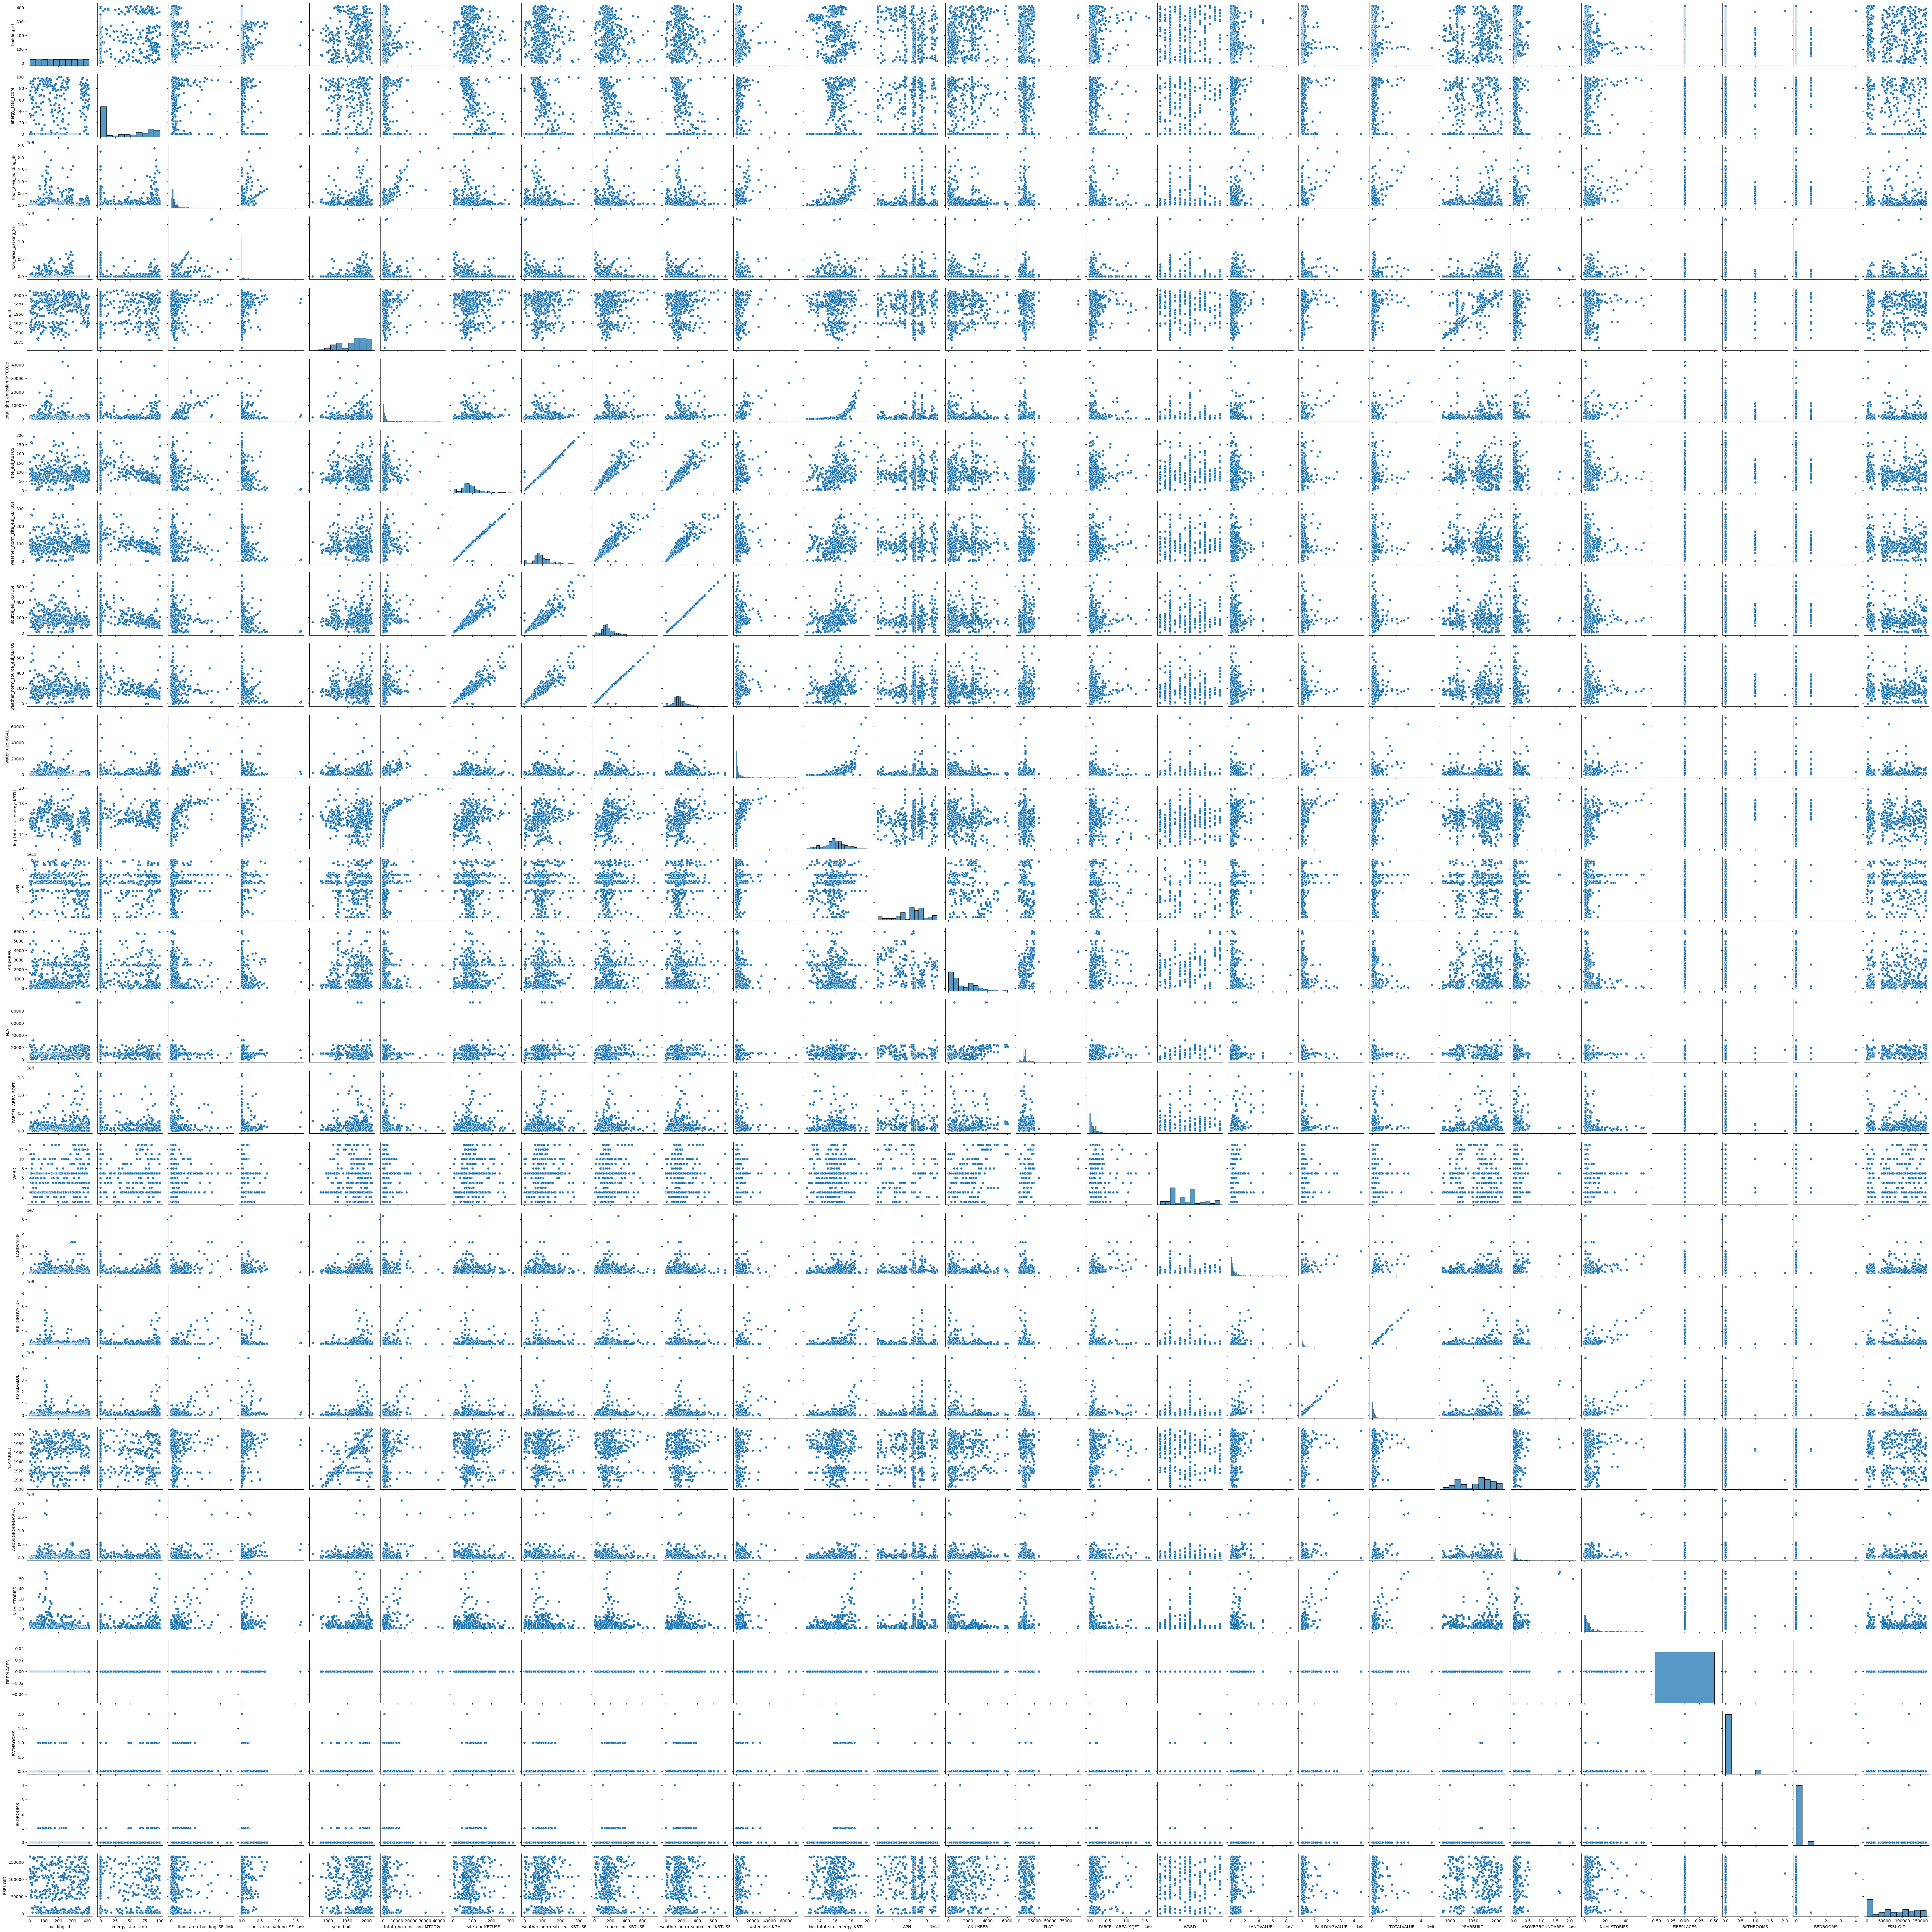

In [ ]:
# THIS TAKES A LOOOONG TIME! ~10 MINUTES ON COLAB FOR ME
import seaborn as sns
sns.pairplot(X_numeric_data)
# DELETE OUTPUT!

In [ ]:
X_numeric_data.dropna(axis=0, how='any')

building_id  energy_star_score  floor_area_building_SF  \
0              1                 36                 62400.0   
2              3                  0                 59172.0   
3              4                 76                 60640.0   
4              5                 89                 60528.0   
5              6                 31                 70000.0   
..           ...                ...                     ...   
405          411                 50                 60083.0   
406          412                 62                 44827.0   
407          413                 80                142460.0   
408          414                 51                205536.0   
409          415                 61                 73618.0   

     floor_area_parking_SF  year_built  total_ghg_emission_MTCO2e  \
0                      0.0        2012                        971   
2                      0.0        1914                       1622   
3                  62000.0        1959                        268   
4                      0.0        1920                        504   
5                  18800.0        1953                        575   
..                     ...         ...                        ...   
405                    0.0        1950                        626   
406                    0.0        1952                        414   
407                    0.0        1997                        959   
408                    0.0        1975                       1707   
409                    0.0        1925                        642   

     site_eui_KBTUSF  weather_norm_site_eui_KBTUSF  source_eui_KBTUSF  \
0                115                           118                251   
2                157                           160                427   
3                 50                            54                 77   
4                 74                            77                136   
5                 77                            84                138   
..               ...                           ...                ...   
405              100                           110                175   
406              106                           115                161   
407               57                            59                111   
408               89                            94                142   
409               89                            96                148   

     weather_norm_source_eui_KBTUSF  ...  LANDVALUE  BUILDINGVALUE  \
0                               252  ...    1504400     12571100.0   
2                               428  ...    1254100      1103400.0   
3                                81  ...     499700      4893300.0   
4                               140  ...     987600      2432400.0   
5                               144  ...    8120300      6497200.0   
..                              ...  ...        ...            ...   
405                             186  ...    1533200      4245300.0   
406                             170  ...      25700        84300.0   
407                             113  ...    2684200     17608300.0   
408                             148  ...    2679100     29705900.0   
409                             156  ...    3721800      3810200.0   

     TOTALVALUE  YEARBUILT  ABOVEGROUNDAREA  NUM_STORIES  FIREPLACES  \
0    14075500.0       2012            36650          5.0         0.0   
2     2357500.0       1941            39260          3.0         0.0   
3     5393000.0       1959            45789          2.0         0.0   
4     3420000.0       1920            45102          3.0         0.0   
5    14617500.0       1955            36717          2.0         0.0   
..          ...        ...              ...          ...         ...   
405   5778500.0       1950            57005          1.0         0.0   
406    110000.0       1916             1642          1.0         0.0   
407  20292500.0       1997           102750          

<Axes: >

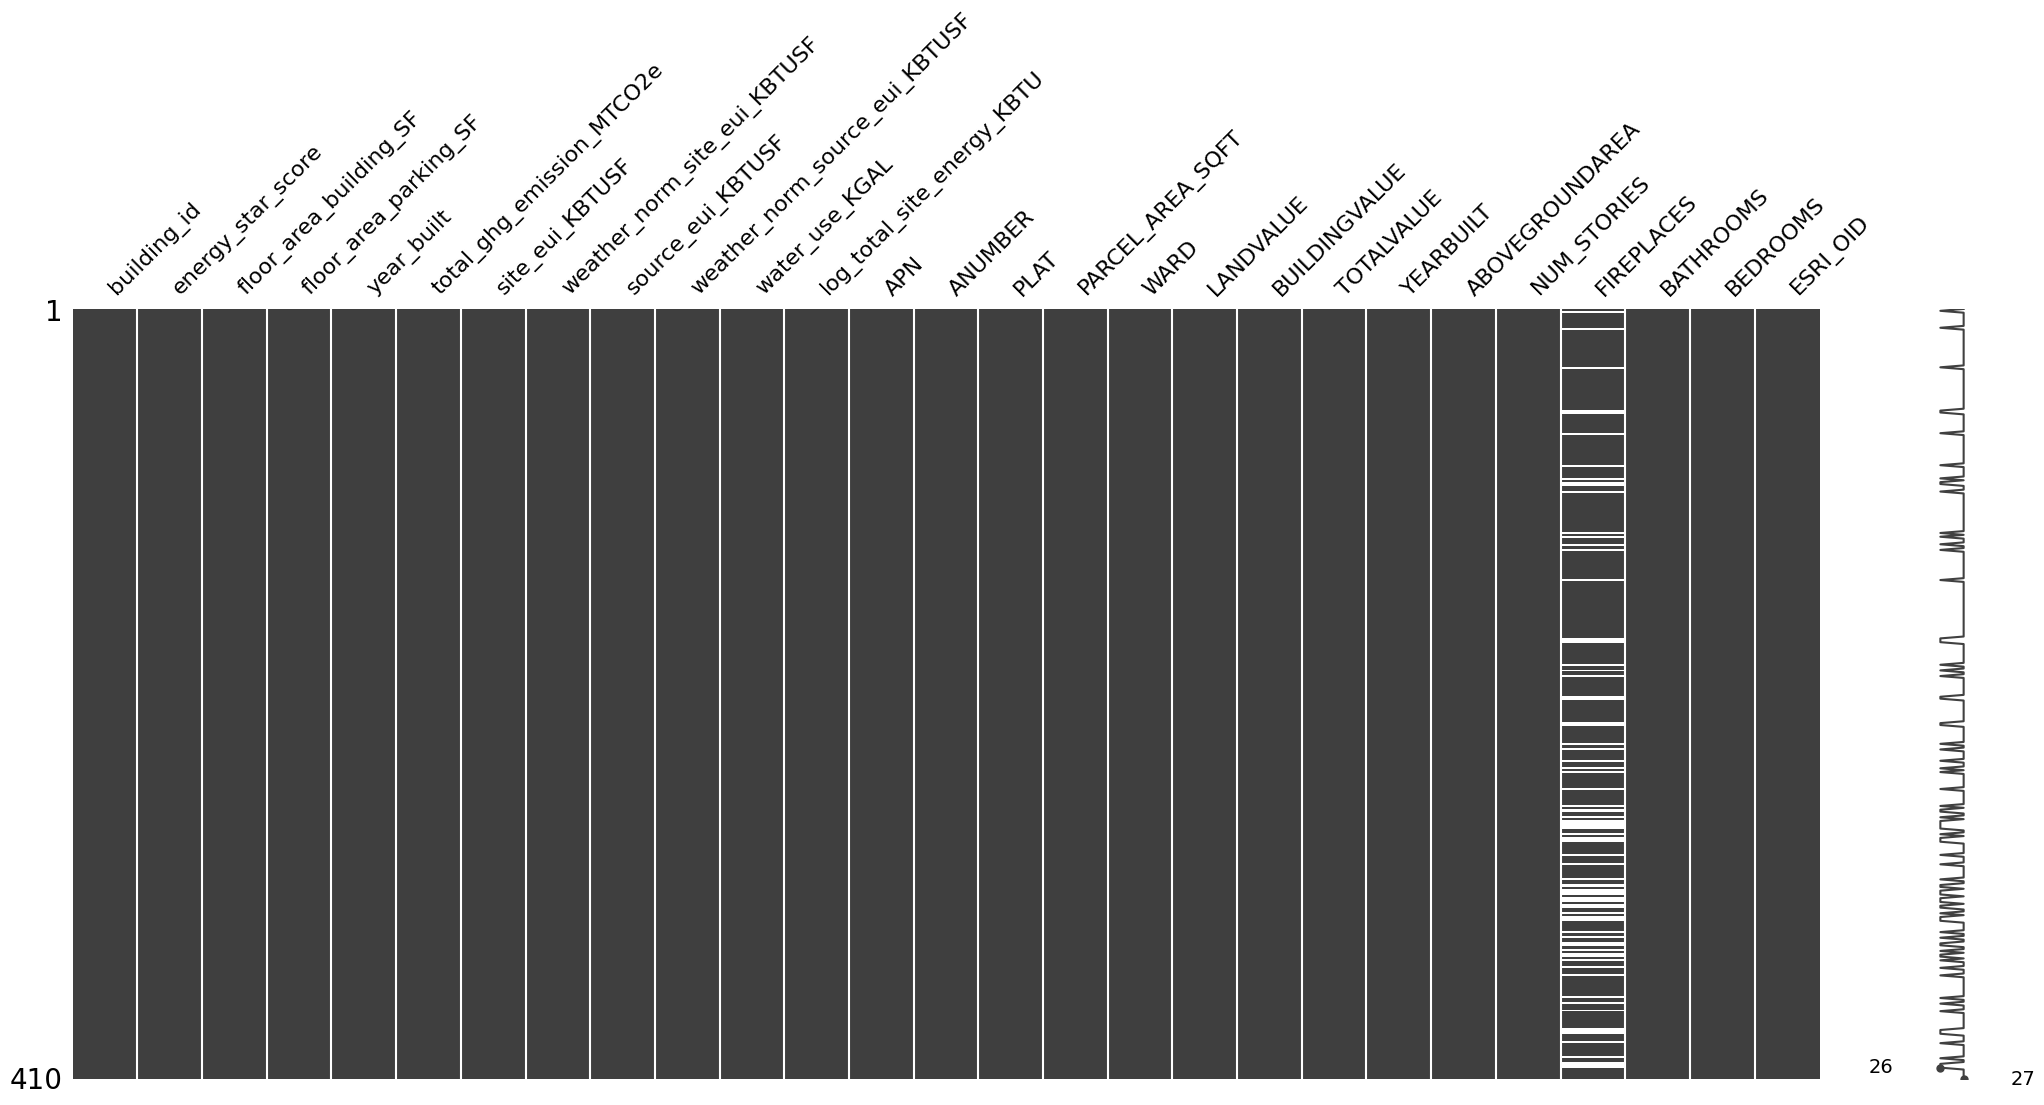

In [ ]:
msno.matrix(X_numeric_data)

Skewness of Numeric Variables:
ABOVEGROUNDAREA                   7.335901
BEDROOMS                          6.737932
BUILDINGVALUE                     6.562083
TOTALVALUE                        6.162176
water_use_KGAL                    5.978037
PLAT                              5.890268
floor_area_parking_SF             5.493532
LANDVALUE                         4.878611
total_ghg_emission_MTCO2e         4.763745
BATHROOMS                         3.935653
NUM_STORIES                       3.893964
floor_area_building_SF            3.380401
PARCEL_AREA_SQFT                  3.375570
source_eui_KBTUSF                 1.705104
weather_norm_source_eui_KBTUSF    1.616206
site_eui_KBTUSF                   1.135065
weather_norm_site_eui_KBTUSF      1.005456
ANUMBER                           1.002937
WARD                              0.593800
energy_star_score                 0.365220
ESRI_OID                          0.062316
FIREPLACES                        0.000000
building_id            

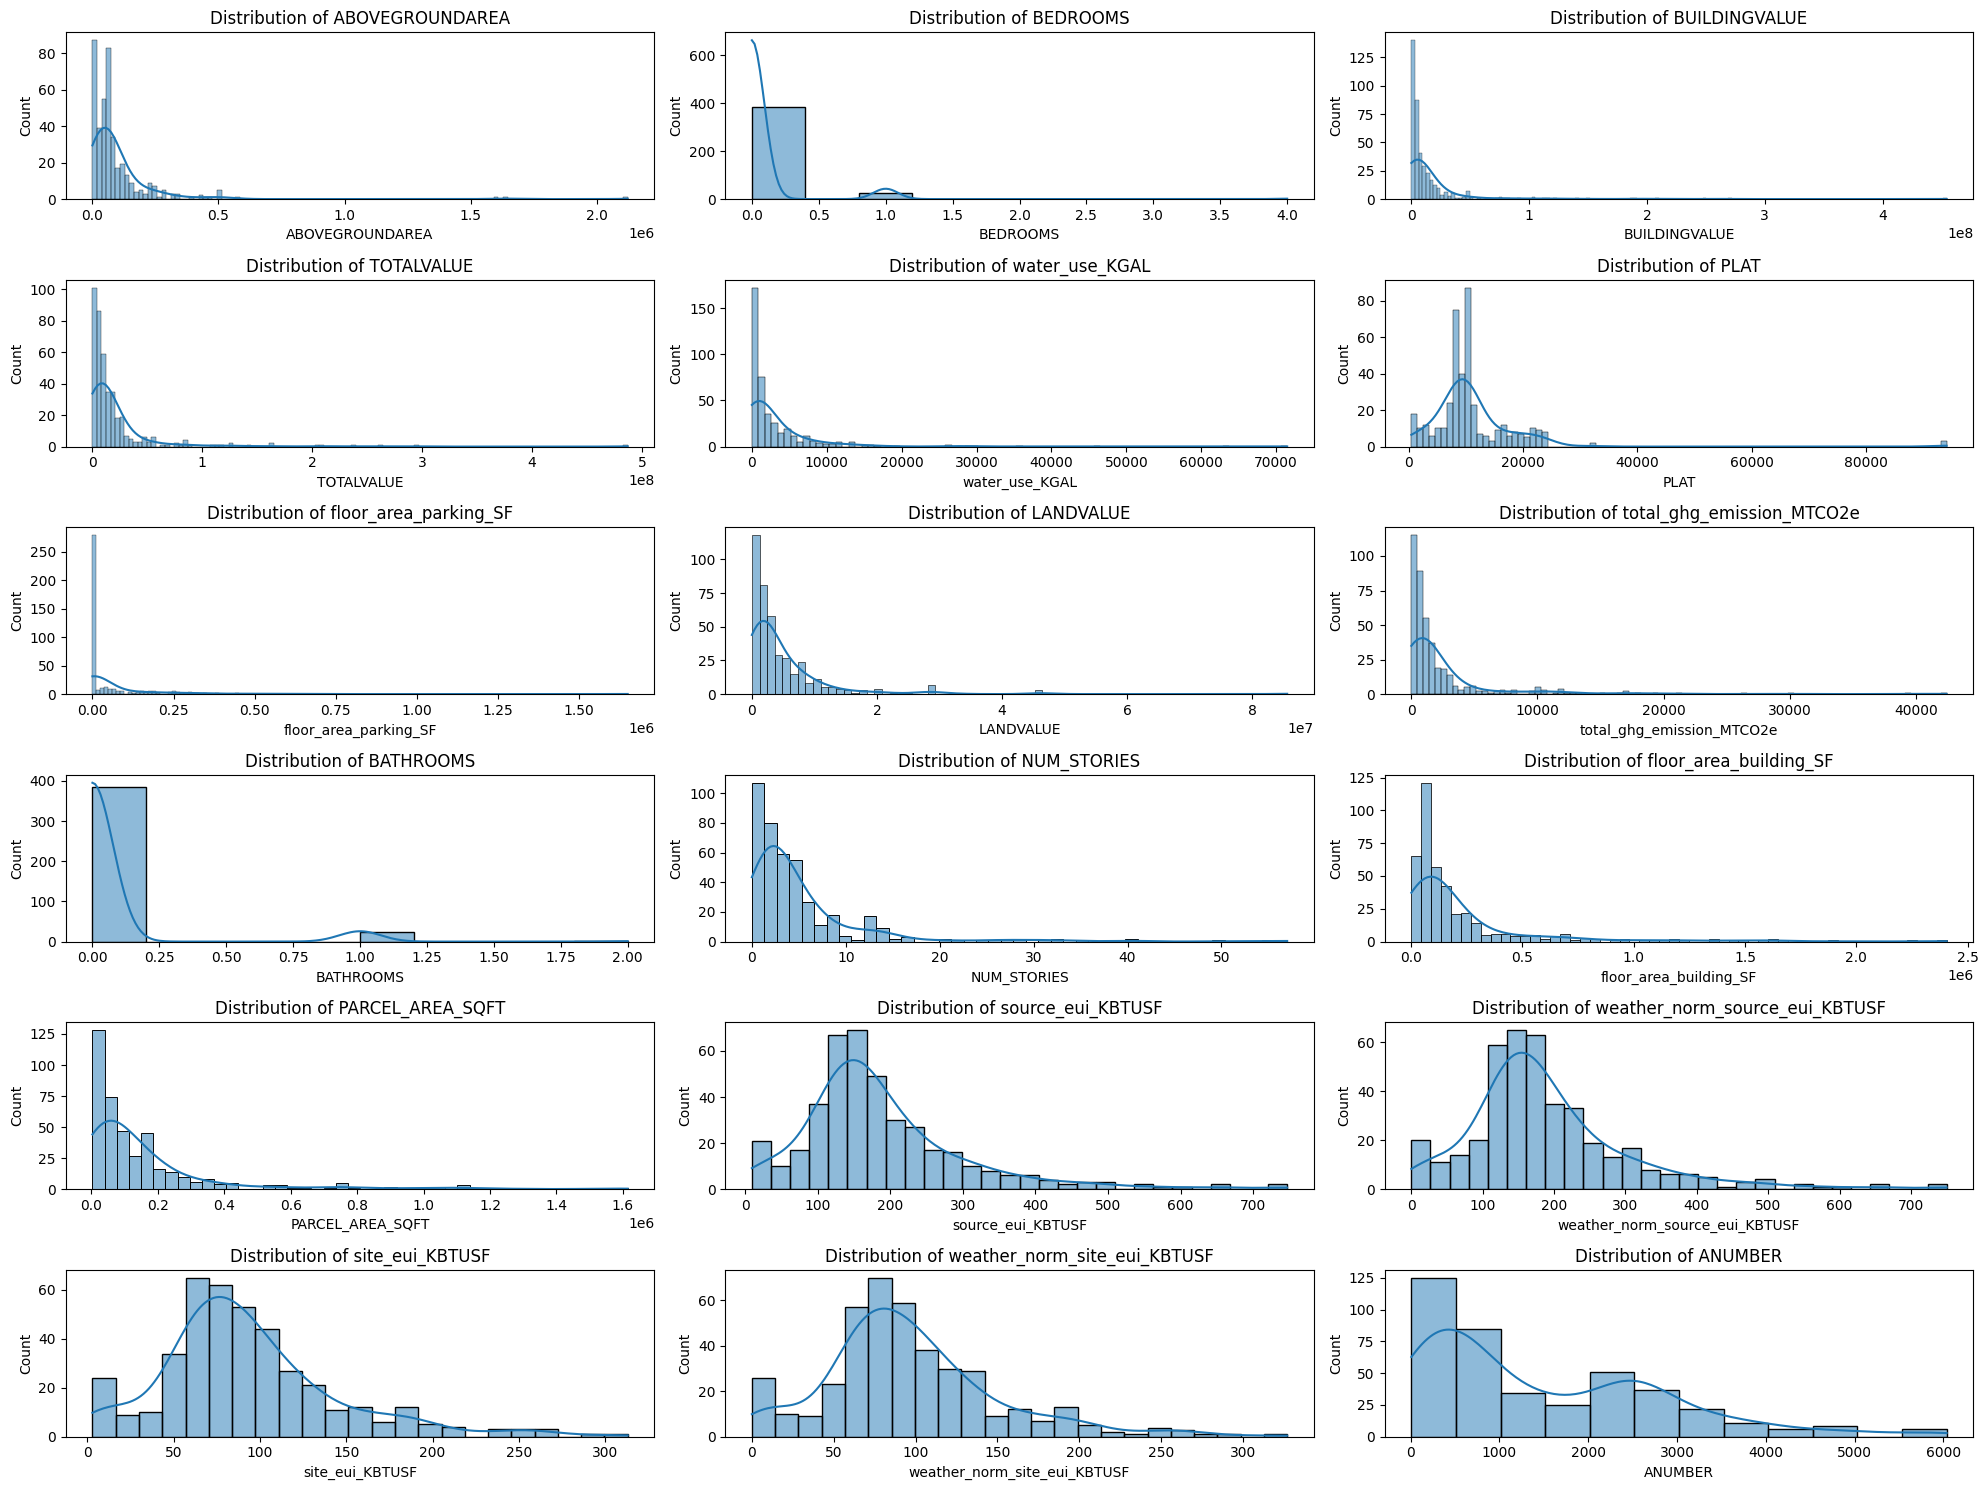

In [ ]:
import seaborn as sns
from scipy.stats import skew


# Check skewness of each numeric column
skewness = X_numeric_data.skew().sort_values(ascending=False)
print("Skewness of Numeric Variables:")
print(skewness)

# Define threshold for skewness to consider log transformation
# Generally, skewness above 0.75 indicates that log transformation could be beneficial
skewed_columns = skewness[skewness > 0.75].index
print(f"Columns to consider for log transformation (skew > 0.75): {skewed_columns}")

num_cols = len(skewed_columns)
num_rows = (num_cols + 2) // 3


# Plot histograms for the skewed columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(skewed_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of rows/columns if needed
    sns.histplot(X_numeric_data[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

Collinear variables: site_eui_KBTUSF and weather_norm_site_eui_KBTUSF
Collinear variables: site_eui_KBTUSF and source_eui_KBTUSF
Collinear variables: site_eui_KBTUSF and weather_norm_source_eui_KBTUSF
Collinear variables: weather_norm_site_eui_KBTUSF and site_eui_KBTUSF
Collinear variables: weather_norm_site_eui_KBTUSF and weather_norm_source_eui_KBTUSF
Collinear variables: source_eui_KBTUSF and site_eui_KBTUSF
Collinear variables: source_eui_KBTUSF and weather_norm_source_eui_KBTUSF
Collinear variables: weather_norm_source_eui_KBTUSF and site_eui_KBTUSF
Collinear variables: weather_norm_source_eui_KBTUSF and weather_norm_site_eui_KBTUSF
Collinear variables: weather_norm_source_eui_KBTUSF and source_eui_KBTUSF
Collinear variables: BUILDINGVALUE and TOTALVALUE
Collinear variables: TOTALVALUE and BUILDINGVALUE
Collinear variables: BATHROOMS and BEDROOMS
Collinear variables: BEDROOMS and BATHROOMS


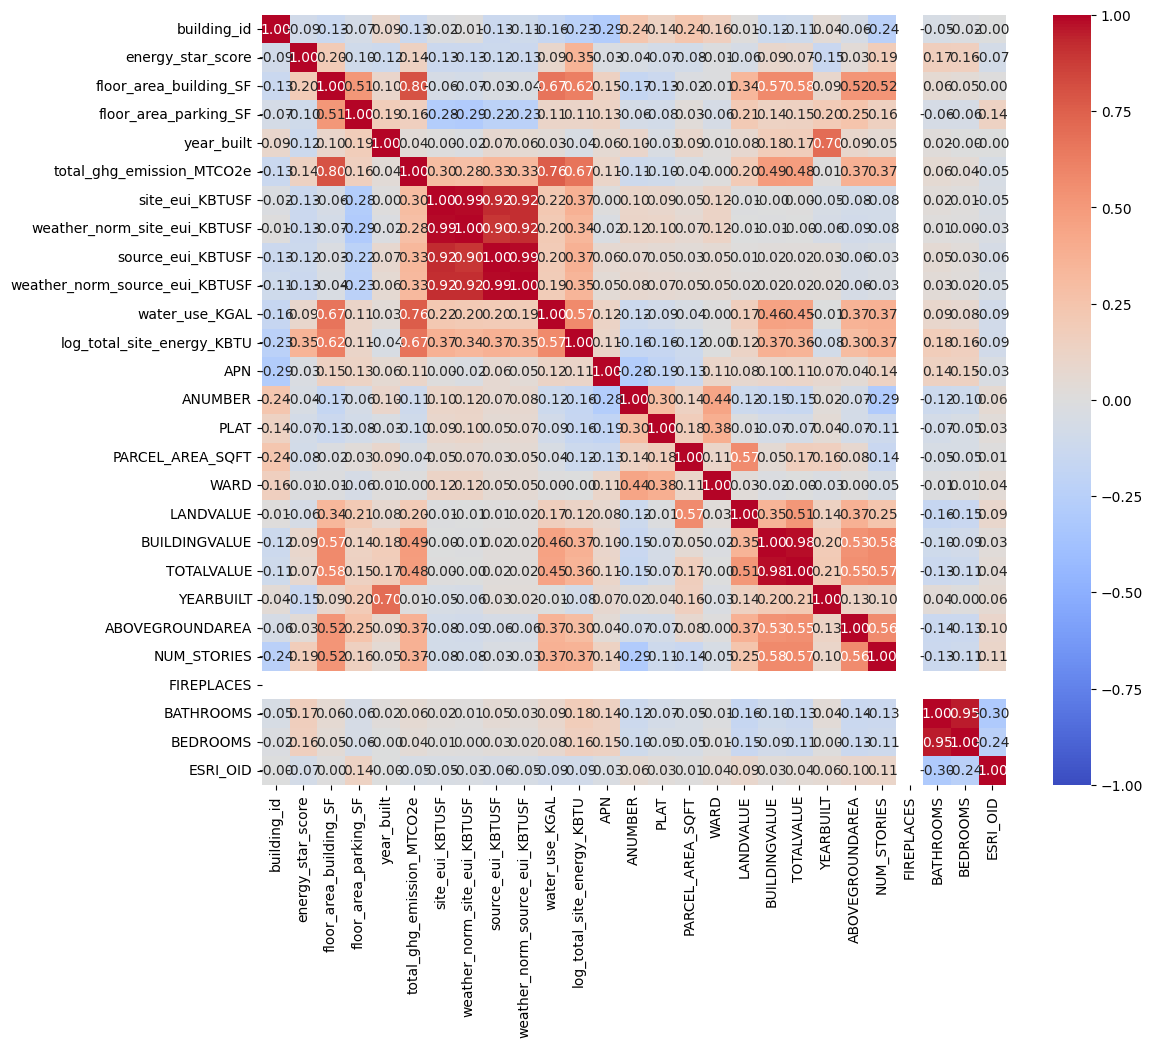

In [ ]:
# Compute the correlation matrix of the numeric data
corr_matrix = X_numeric_data.corr()
threshold = 0.9

collinear_pairs = np.where(np.abs(corr_matrix) > threshold)
collinear_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*collinear_pairs) if x != y]

for pair in collinear_pairs:
    print(f"Collinear variables: {pair[0]} and {pair[1]}")

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [ ]:
# which rows should you drop?
X_numeric_data=X_numeric_data.drop(columns=['building_id','FIREPLACES','weather_norm_site_eui_KBTUSF','source_eui_KBTUSF','weather_norm_source_eui_KBTUSF','log_total_site_energy_KBTU','BUILDINGVALUE', 'LANDVALUE','BATHROOMS', 'ESRI_OID'])



We have droped some variables (e.g. 'building_id','FIREPLACES','weather_norm_site_eui_KBTUSF','source_eui_KBTUSF','weather_norm_source_eui_KBTUSF','log_total_site_energy_KBTU','BUILDINGVALUE', 'LANDVALUE','BATHROOMS', 'ESRI_OID') due to high colonirity.

In [ ]:
X_numeric_data.describe()

energy_star_score  floor_area_building_SF  floor_area_parking_SF  \
count         410.000000            4.100000e+02           4.100000e+02   
mean           35.856098            2.198284e+05           6.348476e+04   
std            38.127200            3.293658e+05           1.630492e+05   
min             0.000000            1.865000e+03           0.000000e+00   
25%             0.000000            5.960925e+04           0.000000e+00   
50%            20.000000            1.042065e+05           0.000000e+00   
75%            77.000000            2.255340e+05           4.563575e+04   
max           100.000000            2.404995e+06           1.650000e+06   

        year_built  total_ghg_emission_MTCO2e  site_eui_KBTUSF  \
count   410.000000                 410.000000       410.000000   
mean   1964.168293                2387.112195        92.741463   
std      33.721620                4609.149534        51.340100   
min    1860.000000                   0.000000         3.000000   
25%    1930.000000                 423.250000        64.000000   
50%    1974.000000                 937.500000        84.000000   
75%    1991.000000                2158.500000       114.750000   
max    2013.000000               42443.000000       313.000000   

       water_use_KGAL           APN      ANUMBER          PLAT  \
count      410.000000  4.100000e+02   410.000000    410.000000   
mean      3200.975610  2.140241e+12  1483.082927  11121.860976   
std       6689.017422  8.258769e+11  1347.470496   9000.859105   
min          0.000000  1.030000e+11     8.000000    440.000000   
25%        271.750000  1.700000e+12   401.000000   7980.000000   
50%       1170.000000  2.200000e+12   920.500000   9794.500000   
75%       3477.750000  2.700000e+12  2415.000000  11860.000000   
max      71463.000000  3.600000e+12  6036.000000  94084.000000   

       PARCEL_AREA_SQFT        WARD    TOTALVALUE    YEARBUILT  \
count      4.100000e+02  410.000000  4.100000e+02   410.000000   
mean       1.521646e+05    5.712195  2.031191e+07  1956.517073   
std        2.199255e+05    3.091925  4.108901e+07    34.055628   
min        3.400000e+03    1.000000  7.550000e+04  1885.000000   
25%        3.034525e+04    3.000000  4.301125e+06  1922.000000   
50%        8.001950e+04    5.000000  9.499500e+06  1965.000000   
75%        1.666500e+05    7.000000  1.967000e+07  1983.750000   
max        1.614500e+06   13.000000  4.870250e+08  2012.000000   

       ABOVEGROUNDAREA  NUM_STORIES    BEDROOMS  
count     4.100000e+02   410.000000  410.000000  
mean      9.702424e+04     5.174878    0.070732  
std       1.757031e+05     7.221157    0.308592  
min       1.000000e+00     0.000000    0.000000  
25%       2.890500e+04     1.000000    0.000000  
50%       5.952350e+04     3.000000    0.000000  
75%       9.735325e+04     6.000000    0.000000  
max       2.122892e+06    57.000000    4.000000

In [ ]:
X_numeric_data.head()

energy_star_score  floor_area_building_SF  floor_area_parking_SF  \
0                 36                 62400.0                    0.0   
1                 68                 59479.0                    0.0   
2                  0                 59172.0                    0.0   
3                 76                 60640.0                62000.0   
4                 89                 60528.0                    0.0   

   year_built  total_ghg_emission_MTCO2e  site_eui_KBTUSF  water_use_KGAL  \
0        2012                        971              115             708   
1        1920                        986               90             882   
2        1914                       1622              157             163   
3        1959                        268               50             674   
4        1920                        504               74             414   

            APN  ANUMBER   PLAT  PARCEL_AREA_SQFT  WARD  TOTALVALUE  \
0  2.300000e+12      201   9497             16715     3  14075500.0   
1  3.030000e+11     1635   8700            120900     3   3520000.0   
2  1.700000e+12     4701  24110             72427    13   2357500.0   
3  2.200000e+12        8  21717            106370    11   5393000.0   
4  2.600000e+12      700   4814             28218     6   3420000.0   

   YEARBUILT  ABOVEGROUNDAREA  NUM_STORIES  BEDROOMS  
0       2012            36650          5.0         0  
1       1913            18169          6.0         0  
2       1941            39260          3.0         0  
3       1959            45789          2.0         0  
4       1920            45102          3.0         0

In [ ]:
# this does not have to be identical to my output as you may have dropped different variables
print("there are (rows, columns) = ", X_numeric_data.shape, "in the numerical variables")

there are (rows, columns) =  (410, 17) in the numerical variables


As they do in the original research https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd we should transform some variables into their log values

their original code (which is in R not in python!) is
```
x_seattle$log_total_area=log(x_seattle$gross_floor_area_total_SF)
x_seattle$log_parking_area=log(x_seattle$gross_floor_area_parking_SF)
x_seattle$log_bldg_area=log(x_seattle$gross_floor_area_building_SF)
x_seattle$log_area_1=log(x_seattle$gross_floor_area_property_type_first_SF)

```
the names are a bit different


In [ ]:
# note: recheck missing values
# this is important: after I apply the log function to some variables cause log(0) = -infinity
print("there are {} missing or infinity values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

there are 0 missing or infinity values in the numerical data


In [ ]:
# translated to python
X_numeric_data["total_ghg_emission_MTCO2e"] = np.log10(X_numeric_data["total_ghg_emission_MTCO2e"])
X_numeric_data["site_eui_KBTUSF"] = np.log10(X_numeric_data["site_eui_KBTUSF"])
X_numeric_data["floor_area_building_SF"] = np.log10(X_numeric_data["floor_area_building_SF"])
X_numeric_data["PARCEL_AREA_SQFT"] = np.log10(X_numeric_data["PARCEL_AREA_SQFT"])
X_numeric_data["floor_area_parking_SF"] = np.log10(X_numeric_data["floor_area_parking_SF"])
X_numeric_data["ANUMBER"] = np.log10(X_numeric_data["ANUMBER"])


... #replace ... with your code

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Ellipsis

In [ ]:
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 272


check what happened to missing values: they may have grown! because  log(0) = -infinity - fix infinities replacing them with NaN

(in in https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd they had replaced them with 0 but I object to that)

In [ ]:
# this has to return 0 now
X_numeric_data.replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 0


In [ ]:
print("the numerical data contains (rows, columns) = ", X_numeric_data.shape)
print("there are {} missing values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

the numerical data contains (rows, columns) =  (410, 17)
there are 272 missing values in the numerical data



you can use `KNNImputer` on the numerical variables, but KNNImputer would fail on categorical variables so you are left with NaNs on categorical variables, which you then need to drop before you run the Random Forest


You can impute separately the numerical and categorical variables, the numerical ones with KNNImputer and the categorical ones with SimpleImputer

## TASK 2.2 use Nearest Neighbor Imputer to impute missing values in numerical features

here we are deviating from the paper. NN imputation is simpler and more common, I think it may be more useful to you in general

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
Xn = imputer.fit_transform(X_numeric_data)

Xn

array([[3.60000000e+01, 4.79518459e+00, 5.28329213e+00, ...,
        3.66500000e+04, 5.00000000e+00, 0.00000000e+00],
       [6.80000000e+01, 4.77436366e+00, 5.06063584e+00, ...,
        1.81690000e+04, 6.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.77211625e+00, 4.85176774e+00, ...,
        3.92600000e+04, 3.00000000e+00, 0.00000000e+00],
       ...,
       [8.00000000e+01, 5.15369294e+00, 4.94491636e+00, ...,
        1.02750000e+05, 3.00000000e+00, 0.00000000e+00],
       [5.10000000e+01, 5.31288790e+00, 5.06063584e+00, ...,
        1.93441000e+05, 2.00000000e+00, 0.00000000e+00],
       [6.10000000e+01, 4.86698401e+00, 5.18720274e+00, ...,
        5.22220000e+04, 2.00000000e+00, 0.00000000e+00]])

## TASK 2.3 Impute missing categorial variables
you will have to remove Nan values and replace them.

You can use `sklearn.impute.SimpleImputer using strategy="most_frequent"` on all variables, but you will have a naif solution for numerical imputations

I prefer to replace them with "None" or a similar string, for which you can use the fillna method: ```df.fillna("None")``` and leave it at that or with a little more effort you can input values based on nearest neighbors or some other inputation scheme. any choice goes so long as it is well described and justified with words.

In [ ]:
### here you replace NaN in categorical with one of the options above
X_categorical_data = X_categorical_data.fillna("None")

# Display the filled categorical features
X_categorical_data.head()

zip     property_type   ST_NAME ST_TYPE ST_POST_DIR PROPERTY_TYPE  \
0  55415            Office   Chicago     Ave           S    Commercial   
1  55403            Office  Hennepin      St           S    Commercial   
2  55410             Other     Beard     Ave           S    Commercial   
3  55419  Worship Facility      60TH      St           W    Commercial   
4  55415            Office      10TH     Ave           S    Commercial   

  MULTIPLE_USES TAX_EXEMPT   NEIGHBORHOOD  COMMUNITY ZONING  \
0            No         No  DOWNTOWN EAST    CENTRAL    C3A   
1            No         No  DOWNTOWN WEST    CENTRAL   B4-1   
2            No         No         FULTON  SOUTHWEST    R1A   
3           Yes         No         WINDOM  SOUTHWEST    R1A   
4           Yes         No    ELLIOT PARK    CENTRAL    B4N   

                     LANDUSE    EXEMPTSTATUS        HOMESTEAD  \
0           OFFICE STRUCTURE  Not Tax Exempt  Not Homesteaded   
1           OFFICE STRUCTURE            None  Not Homesteaded   
2                    UTILITY  Not Tax Exempt  Not Homesteaded   
3  INSTITUTIONS:SCHL,COLLEGE  Not Tax Exempt  Not Homesteaded   
4  INSTITUTIONS:SCHL,COLLEGE  Not Tax Exempt  Not Homesteaded   

          BUILDINGUSE GARAGE_PRESENT PRIMARYHEATING     CONSTRUCTIONTYPE  \
0              Office            Yes     Forced Air          Steel Frame   
1              Office            Yes          Steam  Reinforced Concrete   
2  Telephone Exchange            Yes      Hot Water  Reinforced Concrete   
3              Church            Yes     Forced Air          Steel Frame   
4            Hospital            Yes          Steam         Brick & Mill   

  EXTERIORTYPE  ROOF  
0       Stucco  Flat  
1        Brick  Flat  
2        Brick  Flat  
3        Brick  Flat  
4        Brick  Flat

# TASK 3 One Hot Encode the Categorical Variables

Hint: Once you have done the fit and the transformation, which gives you the transformed data according to the new encoding, what you get is normally a sparse matrix. In principle there is an argument `sparse` to `OneHotEncoder` which should prevent this and give you a dense matrix, which is much easier to handle (consider asking me or looking up what is a sparse matrix!). That attribute did not work for me so once I applied the new encoding I converted the result to a dense matrix as
`Xc = Xc.todense()`

Finally, you will need to use a specific method to get the new names of the variables. Its a method of your model (which I called ohe below) and you can find it in this page here https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
X_categorical_data.describe()

zip property_type   ST_NAME ST_TYPE ST_POST_DIR PROPERTY_TYPE  \
count     410           410       410     410         410           410   
unique     21            44       113       9           7             6   
top     55403        Office  Broadway     Ave           S    Commercial   
freq       61           101        26     228         152           367   

       MULTIPLE_USES TAX_EXEMPT   NEIGHBORHOOD COMMUNITY ZONING  \
count            410        410            410       410    410   
unique             2          2             68        11     22   
top               No         No  DOWNTOWN WEST   CENTRAL   B4-2   
freq             359        255            128       195     47   

                 LANDUSE    EXEMPTSTATUS        HOMESTEAD BUILDINGUSE  \
count                410             410              410         410   
unique                16               3                2          45   
top     OFFICE STRUCTURE  Not Tax Exempt  Not Homesteaded      Office   
freq                 113             208              384          86   

       GARAGE_PRESENT PRIMARYHEATING CONSTRUCTIONTYPE EXTERIORTYPE  ROOF  
count             410            410              410          410   410  
unique              2              7                7            8     7  
top               Yes          Steam         Concrete        Brick  Flat  
freq              402            167              199          201   339

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# DELETE
#your code here
ohe = OneHotEncoder(sparse_output=False, drop='first')
Xc = ohe.fit_transform(X_categorical_data)

encoded_columns = ohe.get_feature_names_out(X_categorical_data.columns)
df_encoded = pd.DataFrame(Xc, columns=encoded_columns)

df_final = df_encoded#pd.concat([X_categorical_data.drop([X_categorical_data.columns], axis=1), df_encoded], axis=1)

print(df_final)
#Xc.shape

     zip_55402  zip_55403  zip_55404  zip_55405  zip_55406  zip_55407  \
0          0.0        0.0        0.0        0.0        0.0        0.0   
1          0.0        1.0        0.0        0.0        0.0        0.0   
2          0.0        0.0        0.0        0.0        0.0        0.0   
3          0.0        0.0        0.0        0.0        0.0        0.0   
4          0.0        0.0        0.0        0.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
405        0.0        0.0        0.0        0.0        0.0        0.0   
406        0.0        0.0        0.0        0.0        0.0        0.0   
407        0.0        0.0        1.0        0.0        0.0        0.0   
408        0.0        0.0        0.0        0.0        0.0        1.0   
409        0.0        0.0        0.0        0.0        0.0        0.0   

     zip_55408  zip_55409  zip_55410  zip_55411  ...  EXTERIORTYPE_Other  \
0          0.0        0.0        0.0        0.0

In [ ]:
# there is a speific method of ohe that allows you to get the names of the features after the encoding is done
feature_name_cat = ohe.get_feature_names_out(X_categorical_data.columns)
feature_name_cat

array(['zip_55402', 'zip_55403', 'zip_55404', 'zip_55405', 'zip_55406',
       'zip_55407', 'zip_55408', 'zip_55409', 'zip_55410', 'zip_55411',
       'zip_55412', 'zip_55413', 'zip_55414', 'zip_55415', 'zip_55416',
       'zip_55418', 'zip_55419', 'zip_55430', 'zip_55454',
       'zip_Minneapolis, MN', 'property_type_College/University',
       'property_type_Convention Center', 'property_type_Courthouse',
       'property_type_Drinking Water Treatment & Distribution',
       'property_type_Financial Office', 'property_type_Fire Station',
       'property_type_Fitness Center/Health Club/Gym',
       'property_type_Hospital (General Medical & Surgical)',
       'property_type_Hotel', 'property_type_Ice/Curling Rink',
       'property_type_Indoor Arena', 'property_type_K-12 School',
       'property_type_Library', 'property_type_Medical Office',
       'property_type_Mixed Use Property', 'property_type_Museum',
       'property_type_Office', 'property_type_Other',
       'property_type_

# Task 4 recombine your numerical and categorical imput features and split your data into training and testing

In [ ]:
# this dont need to be the same for you
Xn.shape

(410, 17)

In [ ]:
# this dont need to be the same for you
Xc.shape

(410, 382)

In [ ]:
X = np.hstack([Xn, Xc])
X.shape

(410, 399)

In [ ]:
print("The dataset has {} features (!!!)".format(X.shape[1]))

The dataset has 399 features (!!!)


In [ ]:
# make a train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TASK 5 run a random forest REGRESSION model

report the score on the tranining and test data and identify the most important features

(hint: if you see "ValueError: Input contains NaN, infinity or a value too large for dtype('float64')." check
1. np.isnan(Xn).sum().sum() and np.isnan(Xc).sum().sum() both return 0
2. np.isinf(Xn).sum().sum() returns 0
3. all the feature that had very large numbers (> 1e5) have been converted to the log of their values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
print ("the model test accuracy is {:.2}".format(rf.score(X_test, y_test)))

the model test accuracy is 0.79


In [ ]:
#this is how you see the importance of the features
rf.feature_importances_[:10]

array([0.00186564, 0.08111154, 0.00276171, 0.00532017, 0.79681892,
       0.00101552, 0.00543135, 0.0032745 , 0.00117717, 0.00430053])

In [ ]:

feature_names = X_numeric_data.columns.tolist() + list(feature_name_cat)
len(feature_names)

399

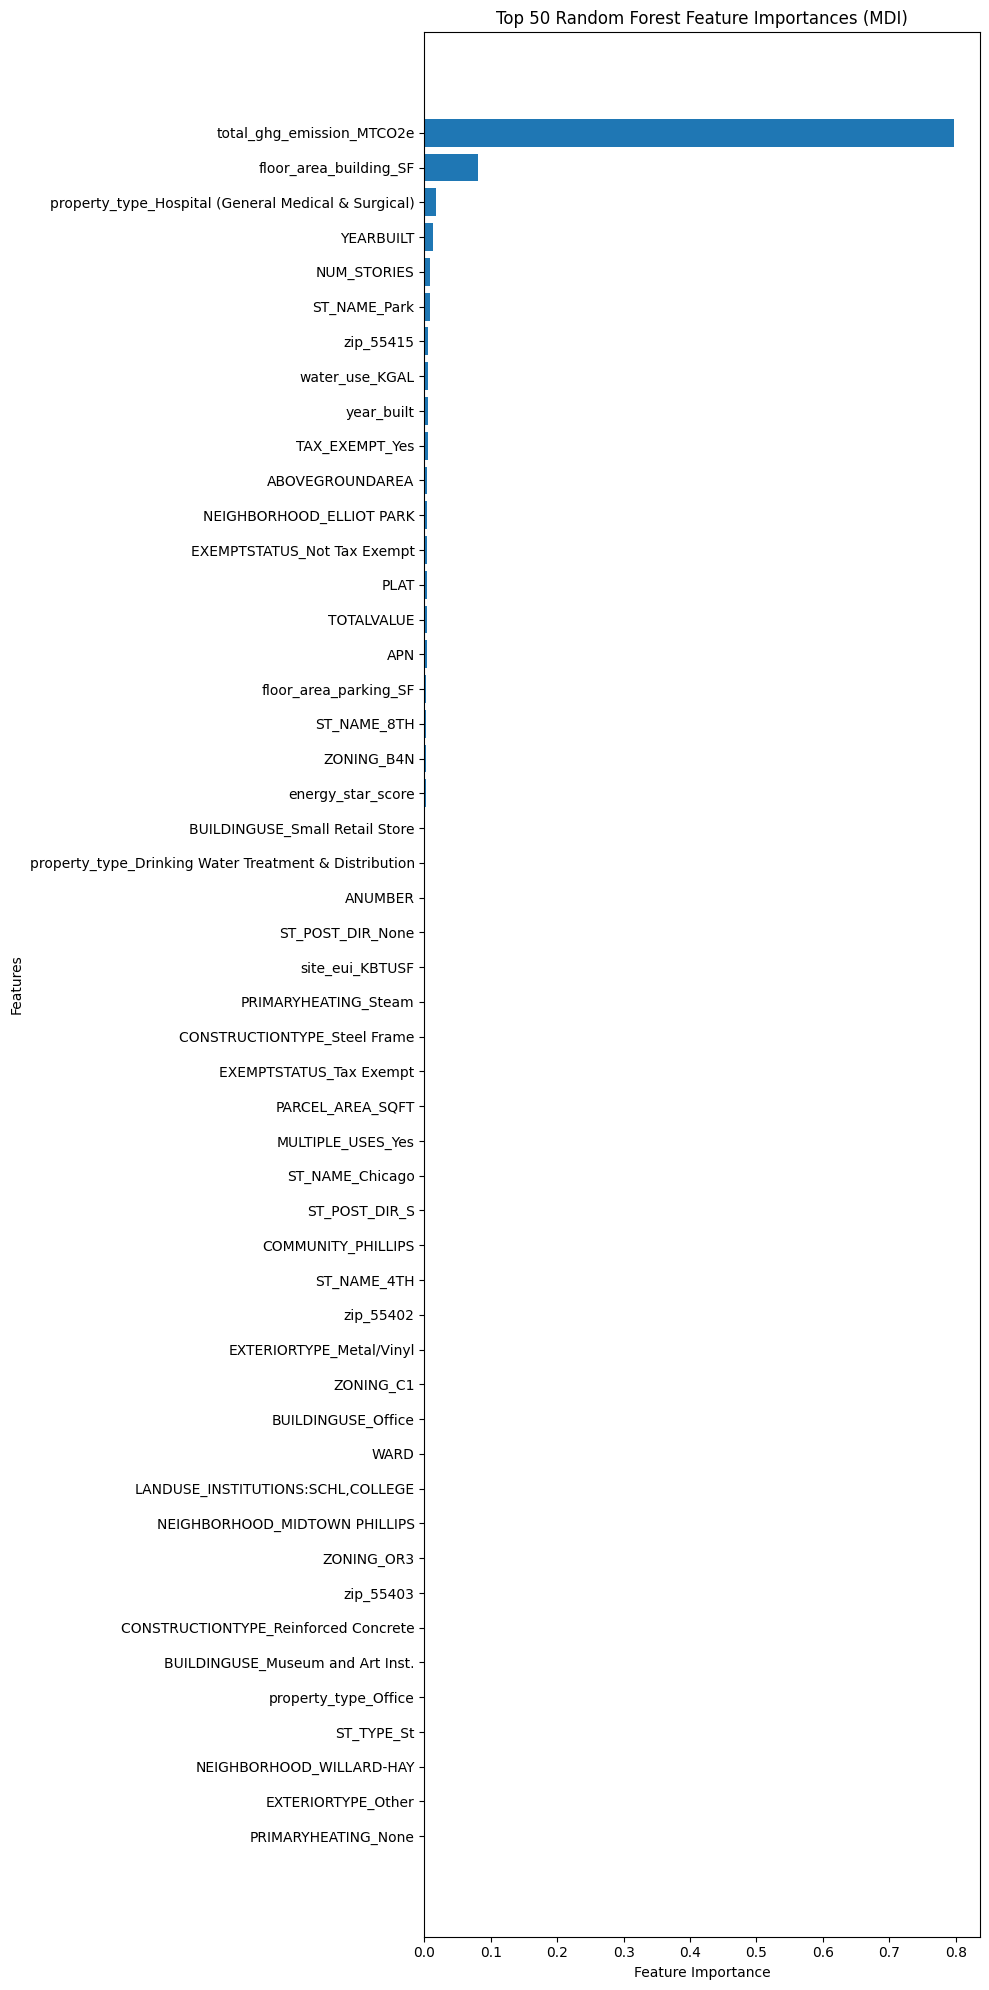

In [ ]:
sorted_idx = rf.feature_importances_.argsort()  # Get sorted indices based on feature importances
top_n = 50  # Number of top features to display
top_sorted_idx = sorted_idx[-top_n:]  # Slice to get the top 50 feature indices

# Plot
fig, ax = plt.subplots(figsize=(10, 20))
y_ticks = np.arange(0, top_n)  # Define the y-ticks for the top 50 features
ax.barh(y_ticks, rf.feature_importances_[top_sorted_idx])  # Plot horizontal bar chart
ax.set_yticks(y_ticks)
ax.set_yticklabels([feature_names[i] for i in top_sorted_idx])  # Set y-tick labels based on feature names
ax.set_title("Top 50 Random Forest Feature Importances (MDI)")
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Features")
fig.tight_layout()

plt.show()

In [ ]:
# CAPTION HERE! How is your model, How is your feature importance results? what can you notice? is it interesting? is it insightful??

The model test accuracy is 0.79

Based on the Random Forest feature importance plot **total_ghg_emission_MTCO2e** is the most significant factor influencing the target variable.**floor_area_building_SF**is another important feature, which is expected as it often plays a crucial role in various predictions, such as energy consumption and property value.

Certain property types, including hospitals and mixed-use properties, also contribute to the model's predictions. This indicates that specific property types may have unique energy demands or emissions profiles.

**water_use_KGAL** is a moderately important feature, which might be relevant if the target variable is related to environmental sustainability, as water usage can correlate with energy consumption and emissions. Geographic location, as represented by zip codes and neighborhood indicators, appears to play a role in the model's predictions too.

Overall, the feature importance plot provides valuable insights into the drivers of energy use, emissions, or environmental impact in buildings



# TASK 6 do it for another city! note: the variable names wont be the same


# useful links and methods and functions I used:

```df.dropna()``` to remove observation with missing variables

```df.drop(columns, axis=1)``` to remove features (columns)


```np.log10()``` and ```np.isinf()``` to convert to log space and find infinite values  

`np.hstack([X1, X2])` to concatenate two arrays


one hot encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html and https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/


KNN imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html , https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/, and
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/  